---
Title: "Analyzing Job Characteristics and Salary Predictions Through Machine Learning Techniques Using LinkedIn Job Posting Data"
author: "Sandy Young"
course: "MGT 665: Solving Problems using Machine Learning"
professor: "Dr. Itauma Itauma"
date: "May 9, 2025"
---

### Abstract
The research addresses the need to forecast salaries accurately using elements extracted from LinkedIn job postings. A two-day job information collection period produced this dataset containing essential variables, including job titles and descriptions, salaries, and company information. The research employs machine learning methods to reveal connections between the variables and their effects on salary establishment. The research applies two primary machine learning approaches for this evaluation, which include Linear Regression based on Chen et al. (2024) alongside the advanced Gradient Boosting Decision Trees (GBDT) model, which demonstrates superior performance in salary prediction according to Yang (2023). The research targets two main objectives: improving salary estimation approaches while analyzing job market features that affect compensation patterns.
The dataset's extensive features enable thorough investigations into how job characteristics affect salaries. Bao (2024) points out educational attainment and professional experience as essential factors that determine salary levels according to previous research and will be included in the model. The analysis will benefit from ensemble learning techniques and natural language processing methods that address the complexities found in job postings to improve prediction accuracy. A study by Maddi et al. (2024) reviews machine learning uses for detecting deceptive job postings yet supports applying these methods to evaluate job data without specific emphasis on salary forecasts. Mohammed et al. (2023) explores machine learning for job position classification but does not address salary prediction directly. The research aims to enhance knowledge about digital age employment and salary analytics by developing practical tools for employers and job seekers.

In [1]:
#importing libraries
%pip install imbalanced-learn==0.10.1
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

df = pd.read_csv('C:/Users/smyou/Downloads/LinkedIn/LinkedInJobs_MLDataset.csv')

Note: you may need to restart the kernel to use updated packages.


In [2]:
df.head()

,Co_Nm,Co_Pg_Lstd,Emp_Cnt,Flw_Cnt,Job_Ttl,Job_Desc,Is_Supvsr,max_sal,med_sal,min_sal,...,st_code,is_remote,views,app_typ,app_is_off,xp_lvl,domain,has_post_domain,is_sponsored,base_comp
0,HearingLife,True,1171,11417,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,False,5250.00,5250.00,5250.00,...,SC,0,9,OffsiteApply,True,Entry level,careers-demant.icims.com,True,0,1
1,"Metalcraft of Mayville, Inc.",True,300,2923,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,False,0.00,0.00,0.00,...,WI,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
2,"U.S. Tsubaki Power Transmission, LLC",True,314,8487,"Manager, Engineering",The TSUBAKI name is synonymous with excellence...,True,0.00,0.00,0.00,...,AL,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
3,Episcopal Communities & Services,True,36,305,Cook,descriptionTitle\n\n Looking for a great oppor...,False,22.27,22.27,22.27,...,CA,0,1,OffsiteApply,True,Entry level,jobs.apploi.com,True,0,1
4,"iHerb, LLC",True,1227,51933,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",False,275834.00,240895.00,205956.00,...,XF,1,0,OffsiteApply,True,Mid-Senior level,careers.iherb.com,True,0,1


In [3]:
df.describe()

,Emp_Cnt,Flw_Cnt,max_sal,med_sal,min_sal,is_remote,views,is_sponsored,base_comp
count,33246.000000,3.324600e+04,3.324600e+04,3.324600e+04,33246.000000,33246.000000,33246.000000,33246.000000,33246.000000
mean,15484.558744,5.234364e+05,3.186615e+04,2.749495e+04,23123.763015,0.144438,45.424592,0.244150,0.401612
std,62180.953563,2.708736e+06,6.823853e+04,5.790564e+04,48977.379084,0.351539,126.972720,0.429588,0.490232
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,148.000000,8.135750e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1235.000000,3.799650e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,7.000000,0.000000,0.000000
75%,8160.000000,1.680360e+05,9.796750e+01,9.000000e+01,84.785000,0.000000,38.000000,0.000000,1.000000
max,829111.000000,3.188720e+07,1.300000e+06,1.050000e+06,998426.000000,1.000000,5656.000000,1.000000,1.000000


#### Data Preprocessing and EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Co_Nm            33242 non-null  object 
 1   Co_Pg_Lstd       33246 non-null  bool   
 2   Emp_Cnt          33246 non-null  int64  
 3   Flw_Cnt          33246 non-null  int64  
 4   Job_Ttl          33246 non-null  object 
 5   Job_Desc         33244 non-null  object 
 6   Is_Supvsr        33246 non-null  bool   
 7   max_sal          33246 non-null  float64
 8   med_sal          33246 non-null  float64
 9   min_sal          33246 non-null  float64
 10  py_prd           33246 non-null  object 
 11  py_lstd          33246 non-null  bool   
 12  wrk_typ          33246 non-null  object 
 13  loc              33246 non-null  object 
 14  st_code          33246 non-null  object 
 15  is_remote        33246 non-null  int64  
 16  views            33246 non-null  int64  
 17  app_typ     

In [5]:
# Define new column names for clarity
new_column_names = {
    'Co_Nm': 'Company_Name',
    'Co_Pg_Lstd': 'Company_Page_Listed',
    'Emp_Cnt': 'Employee_Count',
    'Flw_Cnt': 'Followers_Count',
    'Job_Ttl': 'Job_Title',
    'Job_Desc': 'Job_Description',
    'Is_Supvsr': 'Is_Supervisor',
    'max_sal': 'Max_Salary',
    'med_sal': 'Median_Salary',
    'min_sal': 'Min_Salary',
    'py_prd': 'Posting_Period',
    'py_lstd': 'Posting_Listed',
    'wrk_typ': 'Work_Type',
    'loc': 'Location',
    'st_code': 'State_Code',
    'is_remote': 'Is_Remote',
    'views': 'Views',
    'app_typ': 'Application_Type',
    'app_is_off': 'Application_Is_Offsite',
    'xp_lvl': 'Experience_Level',
    'domain': 'Domain',
    'has_post_domain': 'Has_Posting_Domain',
    'is_sponsored': 'Is_Sponsored',
    'base_comp': 'Base_Compensation'
}

# Rename columns
df.rename(columns=new_column_names, inplace=True)

# Check the updated column names
print(df.columns)

Index(['Company_Name', 'Company_Page_Listed', 'Employee_Count',
       'Followers_Count', 'Job_Title', 'Job_Description', 'Is_Supervisor',
       'Max_Salary', 'Median_Salary', 'Min_Salary', 'Posting_Period',
       'Posting_Listed', 'Work_Type', 'Location', 'State_Code', 'Is_Remote',
       'Views', 'Application_Type', 'Application_Is_Offsite',
       'Experience_Level', 'Domain', 'Has_Posting_Domain', 'Is_Sponsored',
       'Base_Compensation'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company_Name            33242 non-null  object 
 1   Company_Page_Listed     33246 non-null  bool   
 2   Employee_Count          33246 non-null  int64  
 3   Followers_Count         33246 non-null  int64  
 4   Job_Title               33246 non-null  object 
 5   Job_Description         33244 non-null  object 
 6   Is_Supervisor           33246 non-null  bool   
 7   Max_Salary              33246 non-null  float64
 8   Median_Salary           33246 non-null  float64
 9   Min_Salary              33246 non-null  float64
 10  Posting_Period          33246 non-null  object 
 11  Posting_Listed          33246 non-null  bool   
 12  Work_Type               33246 non-null  object 
 13  Location                33246 non-null  object 
 14  State_Code              33246 non-null

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Employee_Count,33246.0,15484.558744,6.218095e+04,0.0,148.00,1235.0,8160.0000,829111.0
Followers_Count,33246.0,523436.391055,2.708736e+06,0.0,8135.75,37996.5,168036.0000,31887198.0
Max_Salary,33246.0,31866.146792,6.823853e+04,0.0,0.00,0.0,97.9675,1300000.0
Median_Salary,33246.0,27494.954904,5.790564e+04,0.0,0.00,0.0,90.0000,1050000.0
Min_Salary,33246.0,23123.763015,4.897738e+04,0.0,0.00,0.0,84.7850,998426.0
Is_Remote,33246.0,0.144438,3.515390e-01,0.0,0.00,0.0,0.0000,1.0
Views,33246.0,45.424592,1.269727e+02,0.0,1.00,7.0,38.0000,5656.0
Is_Sponsored,33246.0,0.244150,4.295884e-01,0.0,0.00,0.0,0.0000,1.0
Base_Compensation,33246.0,0.401612,4.902317e-01,0.0,0.00,0.0,1.0000,1.0


In [8]:
#check the NA counts
df.isna().sum()

Company_Name                  4
Company_Page_Listed           0
Employee_Count                0
Followers_Count               0
Job_Title                     0
Job_Description               2
Is_Supervisor                 0
Max_Salary                    0
Median_Salary                 0
Min_Salary                    0
Posting_Period                0
Posting_Listed                0
Work_Type                     0
Location                      0
State_Code                    0
Is_Remote                     0
Views                         0
Application_Type              0
Application_Is_Offsite        0
Experience_Level              0
Domain                    13558
Has_Posting_Domain            0
Is_Sponsored                  0
Base_Compensation             0
dtype: int64

In [9]:
df.shape

(33246, 24)

In [10]:
#Checking the number of unique values
df.select_dtypes(include='int64').nunique()

Employee_Count       3829
Followers_Count      9119
Is_Remote               2
Views                 789
Is_Sponsored            2
Base_Compensation       2
dtype: int64

In [11]:
#Checking the number of unique values
df.select_dtypes(include='float64').nunique()

Max_Salary       2709
Median_Salary    3186
Min_Salary       2457
dtype: int64

In [12]:
#Checking the number of unique values
df.select_dtypes(include='object').nunique()

Company_Name        11267
Job_Title           22290
Job_Description     30139
Posting_Period          7
Work_Type               7
Location             4621
State_Code             53
Application_Type        3
Experience_Level        7
Domain               2576
dtype: int64

In [13]:
#Checking the number of unique values
df.select_dtypes(include='bool').nunique()

Company_Page_Listed       2
Is_Supervisor             2
Posting_Listed            2
Application_Is_Offsite    2
Has_Posting_Domain        2
dtype: int64

In [14]:
#Categorize Job_Title Variable
#job title has many unique values; lets visualize them
df.Job_Title.unique()
# Define a function to categorize job titles
def categorize_job_title(title):
    title_lower = title.lower()  # Convert to lowercase for case-insensitive matching

    # Check for keywords to assign broader categories
    if 'engineer' in title_lower:
        return 'Engineering'
    elif 'manager' in title_lower:
        return 'Management'
    elif 'nurse' in title_lower:
        return 'Nursing'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'developer' in title_lower:
        return 'Developer'
    elif 'technician' in title_lower:
        return 'Technician'
    elif 'specialist' in title_lower:
        return 'Specialist'
    elif 'consultant' in title_lower:
        return 'Consultant'
    elif 'assistant' in title_lower:
        return 'Assistant'
    elif 'coordinator' in title_lower:
        return 'Coordinator'
    elif 'supervisor' in title_lower:
        return 'Supervisor'
    elif 'designer' in title_lower:
        return 'Designer'
    elif 'research' in title_lower:
        return 'Research'
    elif 'representative' in title_lower:
        return 'Representative'
    elif 'administrator' in title_lower:
        return 'Administrator'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'architect' in title_lower:
        return 'Architect'
    elif 'sales' in title_lower:
        return 'Sales'
    elif 'technologist' in title_lower:
        return 'Technologist'
    else:
        return 'Other'

# Apply the function to create a new column with categorized job titles
df['Categorized_Job_Title'] = df['Job_Title'].apply(categorize_job_title)

# Check the unique values in the new column
print(df['Categorized_Job_Title'].unique())


['Other' 'Engineering' 'Architect' 'Management' 'Technician'
 'Representative' 'Designer' 'Analyst' 'Nursing' 'Specialist' 'Developer'
 'Sales' 'Supervisor' 'Coordinator' 'Assistant' 'Consultant'
 'Administrator' 'Research' 'Technologist']


In [15]:
# Print the count values of all categories
category_counts = df['Categorized_Job_Title'].value_counts()
print(category_counts)

Categorized_Job_Title
Other             12439
Management         5116
Engineering        3262
Specialist         1740
Analyst            1528
Technician         1265
Assistant          1158
Sales              1140
Nursing            1122
Coordinator         732
Representative      727
Developer           688
Supervisor          521
Consultant          478
Architect           387
Designer            314
Administrator       299
Research            171
Technologist        159
Name: count, dtype: int64


In [16]:
# Define a function to categorize job titles
def categorize_job_title(title):
    title_lower = title.lower()  # Convert to lowercase for case-insensitive matching

    # Check for keywords to assign broader categories
    if 'engineer' in title_lower:
        return 'Engineering'
    elif 'manager' in title_lower:
        return 'Management'
    elif 'nurse' in title_lower:
        return 'Nursing'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'developer' in title_lower:
        return 'Developer'
    elif 'technician' in title_lower:
        return 'Technician'
    elif 'specialist' in title_lower:
        return 'Specialist'
    elif 'consultant' in title_lower:
        return 'Consultant'
    elif 'assistant' in title_lower:
        return 'Assistant'
    elif 'coordinator' in title_lower:
        return 'Coordinator'
    elif 'supervisor' in title_lower:
        return 'Supervisor'
    elif 'designer' in title_lower:
        return 'Designer'
    elif 'research' in title_lower:
        return 'Research'
    elif 'representative' in title_lower:
        return 'Representative'
    elif 'administrator' in title_lower:
        return 'Administrator'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'architect' in title_lower:
        return 'Architect'
    elif 'sales' in title_lower:
        return 'Sales'
    elif 'technologist' in title_lower:
        return 'Technologist'
    else:
        return 'Other' if len(title.split()) > 3 else 'Reduced_Other'

# Apply the function to create a new column with categorized job titles
df['Categorized_Job_Title'] = df['Job_Title'].apply(categorize_job_title)

# Check the unique values in the new column
print(df['Categorized_Job_Title'].unique())

['Reduced_Other' 'Other' 'Engineering' 'Architect' 'Management'
 'Technician' 'Representative' 'Designer' 'Analyst' 'Nursing' 'Specialist'
 'Developer' 'Sales' 'Supervisor' 'Coordinator' 'Assistant' 'Consultant'
 'Administrator' 'Research' 'Technologist']


In [17]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Function to extract and count words in job titles
def count_words_in_category(category):
    words = ' '.join(df[df['Categorized_Job_Title'] == category]['Job_Title']).lower().split()
    word_counts = Counter(words)
    return word_counts

# Get word counts for "Other" category
other_word_counts = count_words_in_category('Other')
print("Word counts in 'Other' category:")
print(other_word_counts.most_common(50))  # Adjust the number as needed

print("\n-----------------------------\n")

# Get word counts for "Reduced_Other" category
reduced_other_word_counts = count_words_in_category('Reduced_Other')
print("Word counts in 'Reduced_Other' category:")
print(reduced_other_word_counts.most_common(50))  # Adjust the number as needed

Word counts in 'Other' category:
[('-', 3092), ('associate', 522), ('director', 480), ('of', 466), ('&', 372), ('senior', 347), ('and', 340), ('in', 273), ('time', 245), ('shift', 237), ('lead', 230), ('rn', 230), ('director,', 207), ('tech', 194), ('business', 172), ('service', 160), ('operations', 159), ('driver', 150), ('tax', 149), ('support', 146), ('job', 146), ('make', 146), ('to', 143), ('health', 142), ('/', 140), ('remote', 139), ('care', 136), ('travel', 133), ('executive', 133), ('part', 131), ('team', 130), ('operator', 130), ('management', 128), ('intern', 128), ('services', 127), ('staff', 127), ('development', 123), ('center', 117), ('2024', 116), ('account', 115), ('data', 113), ('i', 113), ('full', 112), ('advisor', 111), ('professional', 100), ('medical', 94), ('vice', 93), ('|', 93), ('ii', 89), ('customer', 89)]

-----------------------------

Word counts in 'Reduced_Other' category:
[('associate', 438), ('accountant', 371), ('senior', 324), ('director', 304), ('ex

In [18]:
# Define a function to recategorize job titles
def recategorize_job_title(title):
    title_lower = title.lower()  # Convert to lowercase for case-insensitive matching

    # Check for keywords to assign broader categories
    if 'engineer' in title_lower:
        return 'Engineering'
    elif 'manager' in title_lower:
        return 'Management'
    elif 'nurse' in title_lower:
        return 'Nursing'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'developer' in title_lower:
        return 'Developer'
    elif 'technician' in title_lower:
        return 'Technician'
    elif 'specialist' in title_lower:
        return 'Specialist'
    elif 'consultant' in title_lower:
        return 'Consultant'
    elif 'assistant' in title_lower:
        return 'Assistant'
    elif 'coordinator' in title_lower:
        return 'Coordinator'
    elif 'supervisor' in title_lower:
        return 'Supervisor'
    elif 'designer' in title_lower:
        return 'Designer'
    elif 'research' in title_lower:
        return 'Research'
    elif 'representative' in title_lower:
        return 'Representative'
    elif 'administrator' in title_lower:
        return 'Administrator'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'architect' in title_lower:
        return 'Architect'
    elif 'sales' in title_lower:
        return 'Sales'
    elif 'technologist' in title_lower:
        return 'Technologist'
    elif 'receptionist' in title_lower:
        return 'Other' if 'analyst' in title_lower else 'Assistant'
    elif 'customer service' in title_lower:
        return 'Other' if 'representative' in title_lower else 'Sales'
    elif 'associate' in title_lower:
        return 'Reduced_Other' if 'director' in title_lower else 'Sales'
    elif 'accountant' in title_lower:
        return 'Reduced_Other' if 'senior' in title_lower else 'Accounting'
    elif 'senior' in title_lower:
        return 'Other' if 'director' in title_lower else 'Senior'
    elif 'director' in title_lower:
        return 'Other' if 'executive' in title_lower else 'Director'
    elif 'executive' in title_lower:
        return 'Reduced_Other' if 'lead' in title_lower else 'Executive'
    elif 'lead' in title_lower:
        return 'Reduced_Other' if 'rn' in title_lower else 'Lead'
    elif 'rn' in title_lower:
        return 'Reduced_Other' if 'operator' in title_lower else 'Nursing'
    elif 'operator' in title_lower:
        return 'Reduced_Other' if 'attorney' in title_lower else 'Operator'
    elif 'attorney' in title_lower:
        return 'Reduced_Other' if 'account' in title_lower else 'Legal'
    elif 'account' in title_lower:
        return 'Reduced_Other' if 'analyst' in title_lower else 'Accounting'
    elif 'associate' in title_lower:
        return 'Reduced_Other' if 'director' in title_lower else 'Sales'
    elif 'of' in title_lower:
        return 'Reduced_Other' if 'director' in title_lower else 'Other'
    elif 'tech' in title_lower:
        return 'Other' if 'director' in title_lower else 'Technical'
    elif 'business' in title_lower:
        return 'Other' if 'director' in title_lower else 'Business'
    elif 'service' in title_lower:
        return 'Other' if 'director' in title_lower else 'Service'
    elif 'operations' in title_lower:
        return 'Other' if 'director' in title_lower else 'Operations'
    elif 'driver' in title_lower:
        return 'Other' if 'director' in title_lower else 'Driver'
    elif 'tax' in title_lower:
        return 'Reduced_Other' if 'director' in title_lower else 'Tax'
    elif 'support' in title_lower:
        return 'Other' if 'director' in title_lower else 'Support'
    elif 'job' in title_lower:
        return 'Other' if 'director' in title_lower else 'Job'
    elif 'make' in title_lower:
        return 'Other' if 'director' in title_lower else 'Make'
    elif 'to' in title_lower:
        return 'Other' if 'director' in title_lower else 'To'
    elif 'health' in title_lower:
        return 'Other' if 'director' in title_lower else 'Health'
    elif '/' in title_lower:
        return 'Other' if 'director' in title_lower else 'Slash'
    elif 'remote' in title_lower:
        return 'Other' if 'director' in title_lower else 'Remote'
    elif 'care' in title_lower:
        return 'Other' if 'director' in title_lower else 'Care'
    elif 'travel' in title_lower:
        return 'Other' if 'director' in title_lower else 'Travel'
    elif 'executive' in title_lower:
        return 'Reduced_Other' if 'lead' in title_lower else 'Executive'
    elif 'part' in title_lower:
        return 'Other' if 'director' in title_lower else 'Part'
    elif 'team' in title_lower:
        return 'Other' if 'director' in title_lower else 'Team'
    elif 'operator' in title_lower:
        return 'Reduced_Other' if 'attorney' in title_lower else 'Operator'
    elif 'management' in title_lower:
        return 'Other' if 'director' in title_lower else 'Management'
    elif 'intern' in title_lower:
        return 'Other' if 'director' in title_lower else 'Intern'
    elif 'services' in title_lower:
        return 'Other' if 'director' in title_lower else 'Services'
    elif 'staff' in title_lower:
        return 'Reduced_Other' if 'director' in title_lower else 'Staff'
    elif 'development' in title_lower:
        return 'Other' if 'director' in title_lower else 'Development'
    elif 'center' in title_lower:
        return 'Other' if 'director' in title_lower else 'Center'
    elif '2024' in title_lower:
        return 'Other' if 'director' in title_lower else '2024'
    elif 'account' in title_lower:
        return 'Reduced_Other' if 'analyst' in title_lower else 'Account'
    elif 'data' in title_lower:
        return 'Other' if 'director' in title_lower else 'Data'
    elif 'i' in title_lower:
        return 'Other' if 'director' in title_lower else 'I'
    elif 'full' in title_lower:
        return 'Other' if 'director' in title_lower else 'Full'
    elif 'advisor' in title_lower:
        return 'Reduced_Other' if 'analyst' in title_lower else 'Advisor'
    elif 'professional' in title_lower:
        return 'Other' if 'director' in title_lower else 'Professional'
    elif 'medical' in title_lower:
        return 'Other' if 'director' in title_lower else 'Medical'
    elif 'vice' in title_lower:
        return 'Other' if 'director' in title_lower else 'Vice'
    elif '|' in title_lower:
        return 'Other' if 'director' in title_lower else 'Pipe'
    elif 'ii' in title_lower:
        return 'Other' if 'director' in title_lower else 'II'
    elif 'customer' in title_lower:
        return 'Other' if 'representative' in title_lower else 'Customer'
    else:
        return 'Other' if len(title.split()) > 3 else 'Reduced_Other'

# Apply the function to create a new column with recategorized job titles
df['Recategorized_Job_Title'] = df['Job_Title'].apply(recategorize_job_title)

# Check the unique values in the new column
print(df['Recategorized_Job_Title'].unique())

['Care' 'Sales' 'Engineering' 'Reduced_Other' 'Architect' 'Management'
 'Director' 'Technician' 'Technical' 'I' 'Representative' 'Designer'
 'Analyst' 'Nursing' 'Remote' 'Other' 'To' 'Specialist' 'Developer'
 'Supervisor' 'Coordinator' 'Driver' 'Lead' 'Slash' 'Operator' 'Assistant'
 'Staff' 'Consultant' 'Part' 'Senior' 'Administrator' 'Research' 'Support'
 'Accounting' 'Tax' 'Technologist' 'Health' '2024' 'Service' 'Executive'
 'Center' 'Team' 'Data' 'Operations' 'Business' 'Development' 'Job'
 'Travel' 'Pipe' 'Make' 'Full']


['Healthcare' 'Sales' 'Engineering' 'Other' 'Management' 'Technical'
 'Creative' 'Analyst' 'Specialist' 'Assistant' 'Financial']
Grouped_Category
Management     8983
Other          7322
Engineering    3649
Sales          2911
Technical      2802
Healthcare     2414
Specialist     1740
Analyst        1528
Assistant      1223
Financial       360
Creative        314
Name: count, dtype: int64


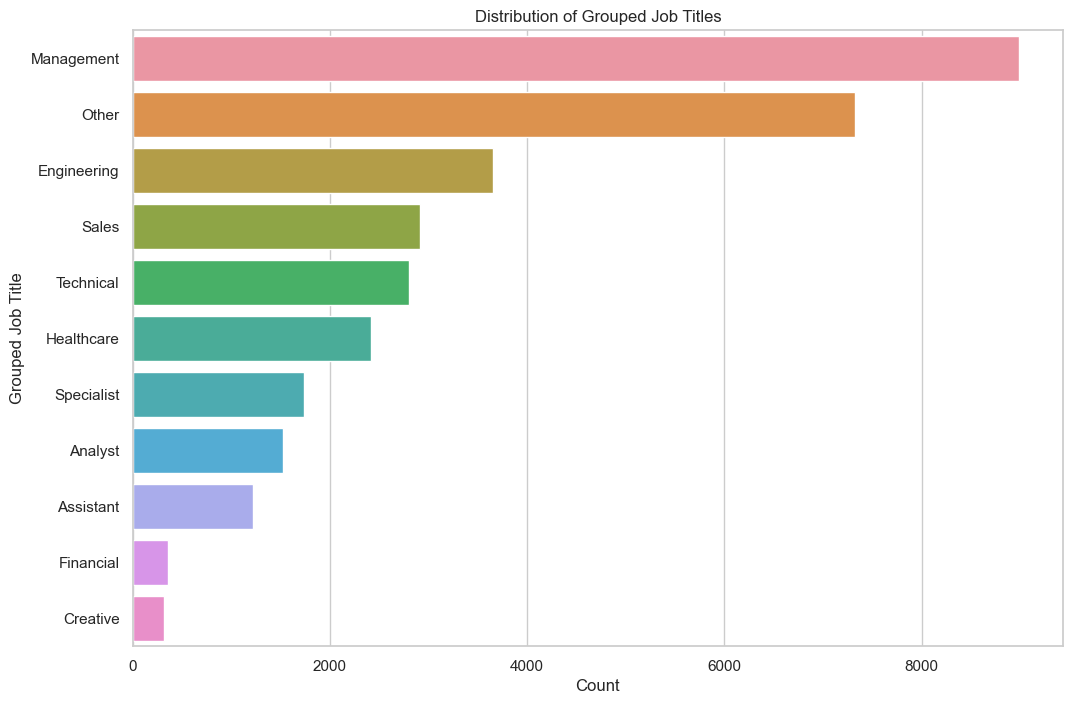

In [19]:
# Define a mapping for grouping categories
category_mapping = {
    'Management': 'Management',
    'Engineering': 'Engineering',
    'I': 'Other',
    'Nursing': 'Healthcare',
    'Sales': 'Sales',
    'Specialist': 'Specialist',
    'Analyst': 'Analyst',
    'Technician': 'Technical',
    'Assistant': 'Assistant',
    'Reduced_Other': 'Other',
    'Director': 'Management',
    'To': 'Other',
    'Other': 'Other',
    'Coordinator': 'Management',
    'Representative': 'Sales',
    'Developer': 'Technical',
    'Supervisor': 'Management',
    'Lead': 'Management',
    'Consultant': 'Management',
    'Architect': 'Engineering',
    'Senior': 'Other',
    'Slash': 'Other',
    'Accounting': 'Financial',
    'Technical': 'Technical',
    'Designer': 'Creative',
    'Administrator': 'Management',
    'Operator': 'Technical',
    'Executive': 'Management',
    'Driver': 'Other',
    'Part': 'Other',
    'Research': 'Other',
    'Service': 'Other',
    'Technologist': 'Technical',
    'Health': 'Healthcare',
    'Support': 'Other',
    'Care': 'Healthcare',
    'Staff': 'Other',
    'Team': 'Management',
    'Business': 'Other',
    'Data': 'Technical',
    'Remote': 'Other',
    'Job': 'Other',
    'Operations': 'Management',
    'Travel': 'Other',
    'Center': 'Management',
    '2024': 'Other',
    'Tax': 'Financial',
    'Make': 'Other',
    'Development': 'Other',
    'Full': 'Other',
    'Pipe': 'Other'
}

# Map the categories using the defined mapping
df['Grouped_Category'] = df['Recategorized_Job_Title'].map(category_mapping)

# Check the unique values in the new column
print(df['Grouped_Category'].unique())

# Print the count values of grouped categories
grouped_category_counts = df['Grouped_Category'].value_counts()
print(grouped_category_counts)

# Set the plot style
sns.set(style="whitegrid")

# Plot a bar chart for the grouped categories
plt.figure(figsize=(12, 8))
sns.countplot(y='Grouped_Category', data=df, order=df['Grouped_Category'].value_counts().index)
plt.title('Distribution of Grouped Job Titles')
plt.xlabel('Count')
plt.ylabel('Grouped Job Title')
plt.show()

In [20]:
# Print the count values of all categories
category_counts_recategorized = df['Grouped_Category'].value_counts()
print(category_counts_recategorized)

Grouped_Category
Management     8983
Other          7322
Engineering    3649
Sales          2911
Technical      2802
Healthcare     2414
Specialist     1740
Analyst        1528
Assistant      1223
Financial       360
Creative        314
Name: count, dtype: int64


In [21]:
#job title has many unique values; lets visualize them
df.Location.unique()

array(['Little River, SC', 'Beaver Dam, WI', 'Bessemer, AL', ...,
       'Brunswick, TN', 'South Boston, VA', 'Placerville, CA'],
      dtype=object)

In [22]:
# Define a function to categorize locations into broader regions based on state codes
def categorize_location(location):
    state_code = location.split(",")[-1].strip()  # Extract the state code

    # Define mappings of state codes to broader regions
    region_mapping = {
        'AL': 'South',
        'AK': 'West',
        'AZ': 'West',
        'AR': 'South',
        'CA': 'West',
        'CO': 'West',
        'CT': 'East',
        'DE': 'East',
        'FL': 'South',
        'GA': 'South',
        'HI': 'West',
        'ID': 'West',
        'IL': 'Central',
        'IN': 'Central',
        'IA': 'Central',
        'KS': 'Central',
        'KY': 'South',
        'LA': 'South',
        'ME': 'North',
        'MD': 'East',
        'MA': 'East',
        'MI': 'Central',
        'MN': 'North',
        'MS': 'South',
        'MO': 'Central',
        'MT': 'West',
        'NE': 'Central',
        'NV': 'West',
        'NH': 'North',
        'NJ': 'East',
        'NM': 'West',
        'NY': 'East',
        'NC': 'South',
        'ND': 'North',
        'OH': 'Central',
        'OK': 'Central',
        'OR': 'West',
        'PA': 'East',
        'RI': 'East',
        'SC': 'South',
        'SD': 'North',
        'TN': 'South',
        'TX': 'South',
        'UT': 'West',
        'VT': 'North',
        'VA': 'East',
        'WA': 'West',
        'WV': 'South',
        'WI': 'Central',
        'WY': 'West',
    }

    # Use the mapping or assign to 'Other' if not found
    return region_mapping.get(state_code, 'Other')

# Apply the function to create a new column with categorized locations
df['Categorized_Location'] = df['Location'].apply(categorize_location)

# Check the unique values in the new column
print(df['Categorized_Location'].unique())

['South' 'Central' 'West' 'Other' 'East' 'North']


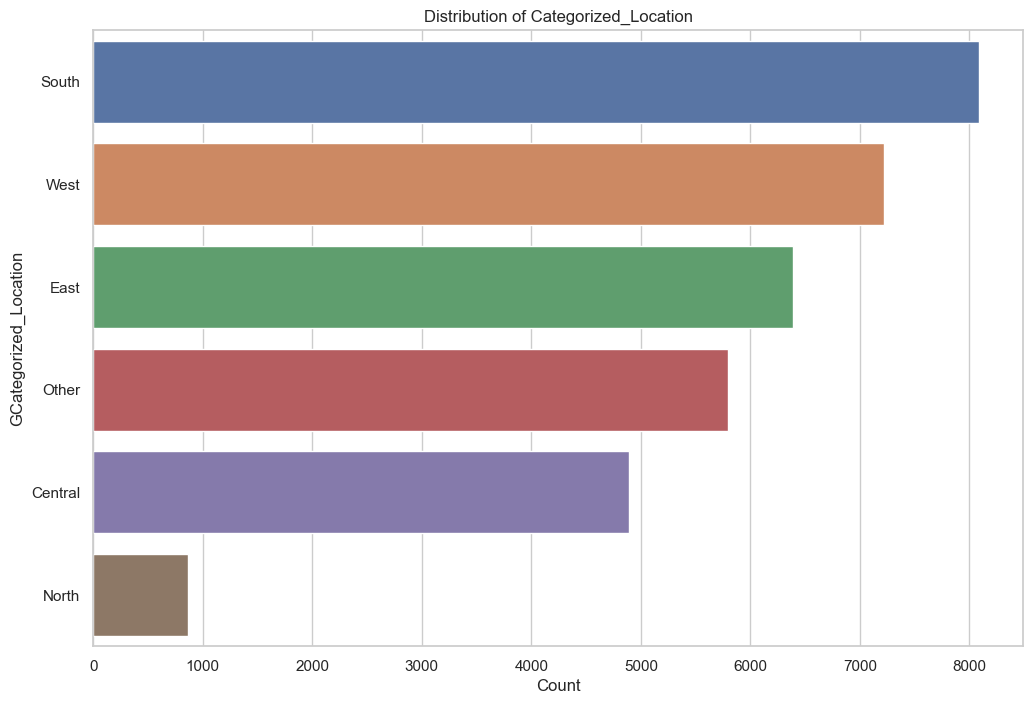

In [23]:
# Set the plot style
sns.set(style="whitegrid")

# Plot a bar chart for the grouped categories
plt.figure(figsize=(12, 8))
sns.countplot(y='Categorized_Location', data=df, order=df['Categorized_Location'].value_counts().index)
plt.title('Distribution of Categorized_Location')
plt.xlabel('Count')
plt.ylabel('GCategorized_Location')
plt.show()

In [24]:
# Drop specified columns
df.drop(['Job_Title','Categorized_Job_Title','Recategorized_Job_Title', 'Location', 'State_Code'], axis=1, inplace=True)

# Check the updated DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company_Name            33242 non-null  object 
 1   Company_Page_Listed     33246 non-null  bool   
 2   Employee_Count          33246 non-null  int64  
 3   Followers_Count         33246 non-null  int64  
 4   Job_Description         33244 non-null  object 
 5   Is_Supervisor           33246 non-null  bool   
 6   Max_Salary              33246 non-null  float64
 7   Median_Salary           33246 non-null  float64
 8   Min_Salary              33246 non-null  float64
 9   Posting_Period          33246 non-null  object 
 10  Posting_Listed          33246 non-null  bool   
 11  Work_Type               33246 non-null  object 
 12  Is_Remote               33246 non-null  int64  
 13  Views                   33246 non-null  int64  
 14  Application_Type        33246 non-null

In [25]:
df.head()

,Company_Name,Company_Page_Listed,Employee_Count,Followers_Count,Job_Description,Is_Supervisor,Max_Salary,Median_Salary,Min_Salary,Posting_Period,...,Views,Application_Type,Application_Is_Offsite,Experience_Level,Domain,Has_Posting_Domain,Is_Sponsored,Base_Compensation,Grouped_Category,Categorized_Location
0,HearingLife,True,1171,11417,Overview\n\nHearingLife is a national hearing ...,False,5250.00,5250.00,5250.00,MONTHLY,...,9,OffsiteApply,True,Entry level,careers-demant.icims.com,True,0,1,Healthcare,South
1,"Metalcraft of Mayville, Inc.",True,300,2923,Metalcraft of Mayville\nMetalcraft of Mayville...,False,0.00,0.00,0.00,Not Listed,...,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0,Sales,Central
2,"U.S. Tsubaki Power Transmission, LLC",True,314,8487,The TSUBAKI name is synonymous with excellence...,True,0.00,0.00,0.00,Not Listed,...,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0,Engineering,South
3,Episcopal Communities & Services,True,36,305,descriptionTitle\n\n Looking for a great oppor...,False,22.27,22.27,22.27,HOURLY,...,1,OffsiteApply,True,Entry level,jobs.apploi.com,True,0,1,Other,West
4,"iHerb, LLC",True,1227,51933,"Job Summary\nAt iHerb, we are on a mission to ...",False,275834.00,240895.00,205956.00,YEARLY,...,0,OffsiteApply,True,Mid-Senior level,careers.iherb.com,True,0,1,Engineering,Other


In [26]:
#check the NA counts
df.isna().sum()

Company_Name                  4
Company_Page_Listed           0
Employee_Count                0
Followers_Count               0
Job_Description               2
Is_Supervisor                 0
Max_Salary                    0
Median_Salary                 0
Min_Salary                    0
Posting_Period                0
Posting_Listed                0
Work_Type                     0
Is_Remote                     0
Views                         0
Application_Type              0
Application_Is_Offsite        0
Experience_Level              0
Domain                    13558
Has_Posting_Domain            0
Is_Sponsored                  0
Base_Compensation             0
Grouped_Category              0
Categorized_Location          0
dtype: int64

In [27]:
# Drop rows with null values
df.dropna(inplace=True)

In [28]:
#check duplicate values
df.duplicated().sum()

514

In [29]:
#drop the duplicated values
df = df.drop_duplicates()

In [30]:
df.shape

(19174, 23)

In [31]:
column_names = df.columns.tolist()
print("Column Names:")
print(column_names)

Column Names:
['Company_Name', 'Company_Page_Listed', 'Employee_Count', 'Followers_Count', 'Job_Description', 'Is_Supervisor', 'Max_Salary', 'Median_Salary', 'Min_Salary', 'Posting_Period', 'Posting_Listed', 'Work_Type', 'Is_Remote', 'Views', 'Application_Type', 'Application_Is_Offsite', 'Experience_Level', 'Domain', 'Has_Posting_Domain', 'Is_Sponsored', 'Base_Compensation', 'Grouped_Category', 'Categorized_Location']


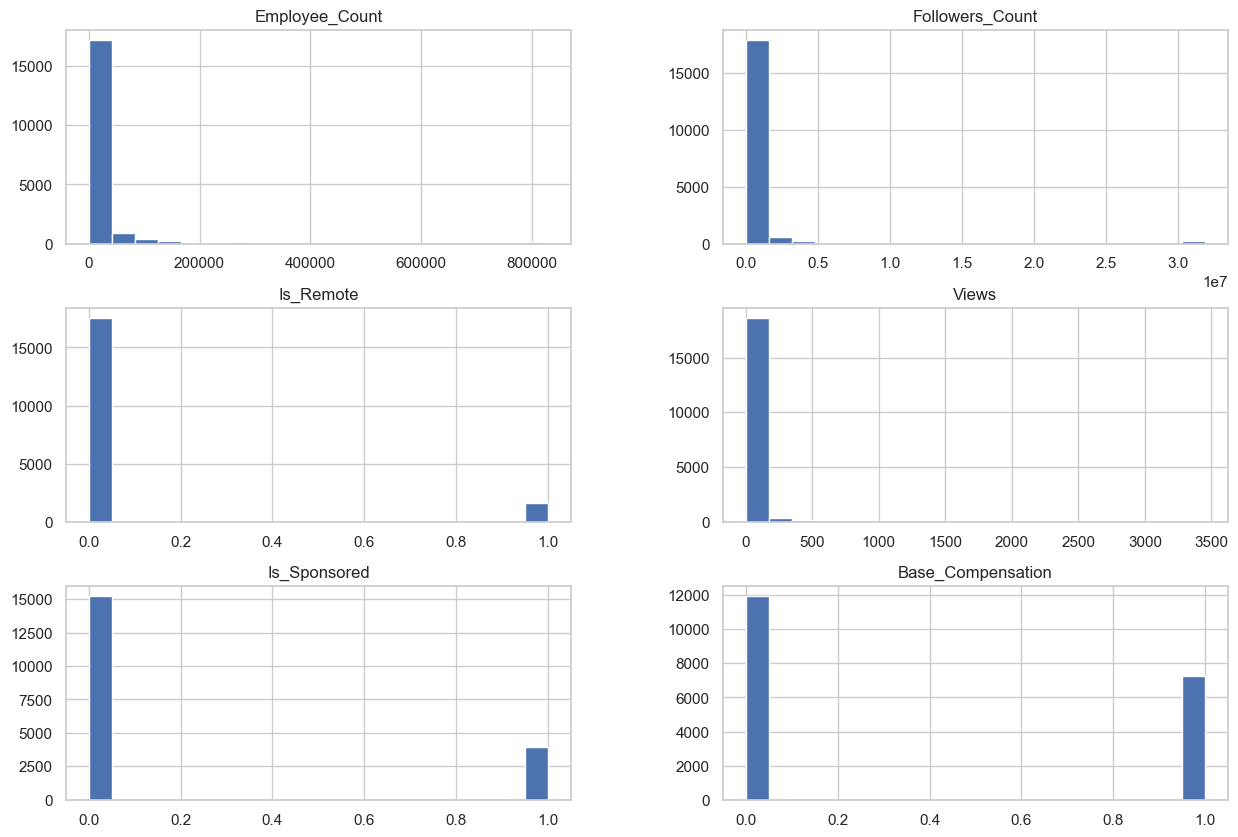

In [32]:
numeric_columns = df.select_dtypes(include=['int64'])
numeric_columns.hist(bins=20, figsize=(15, 10))
plt.show()

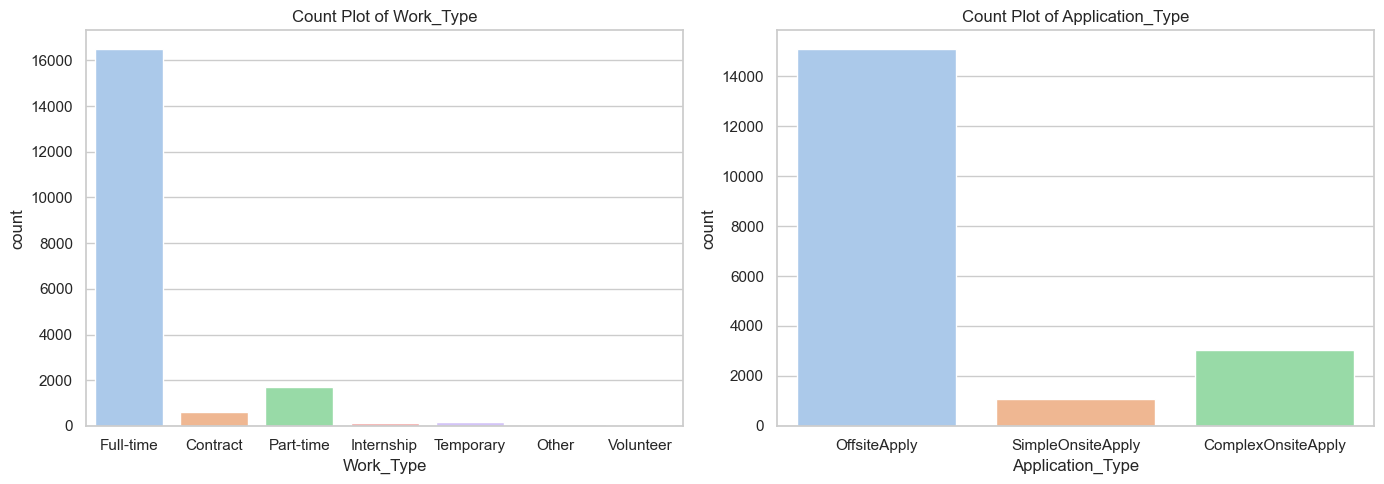

In [33]:
# Combined side-by-side count plot for categorical variables
categorical_columns = ['Work_Type','Application_Type']
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(14, 5))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

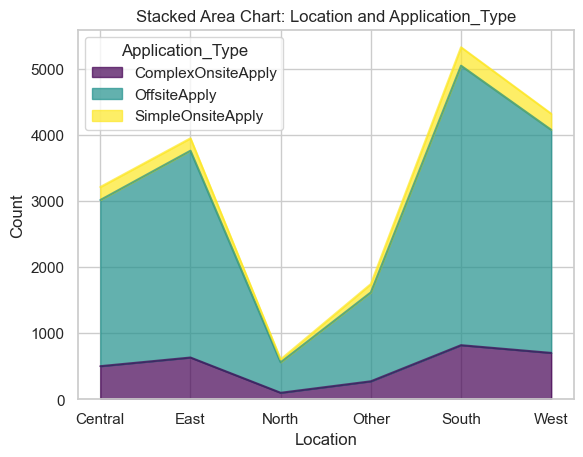

In [34]:
#Stacked Area Chart .
crosstab = pd.crosstab(df['Categorized_Location'],df['Application_Type'])
crosstab.plot(kind='area', colormap='viridis', alpha=0.7, stacked=True)
plt.title('Stacked Area Chart: Location and Application_Type')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

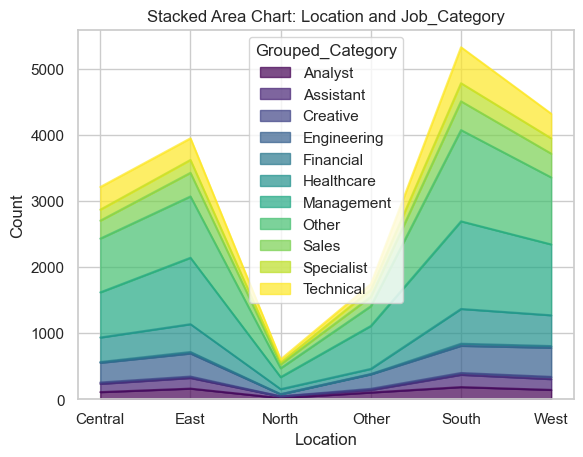

In [35]:
#Stacked Area Chart .
crosstab = pd.crosstab(df['Categorized_Location'],df['Grouped_Category'])
crosstab.plot(kind='area', colormap='viridis', alpha=0.7, stacked=True)
plt.title('Stacked Area Chart: Location and Job_Category')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

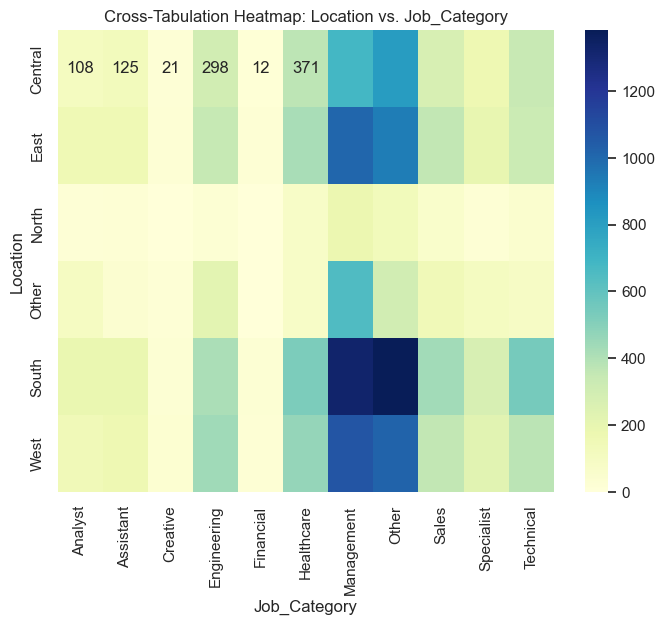

In [36]:
crosstab = pd.crosstab(df['Categorized_Location'], df['Grouped_Category'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Cross-Tabulation Heatmap: Location vs. Job_Category')
plt.xlabel('Job_Category')
plt.ylabel('Location')
plt.show()

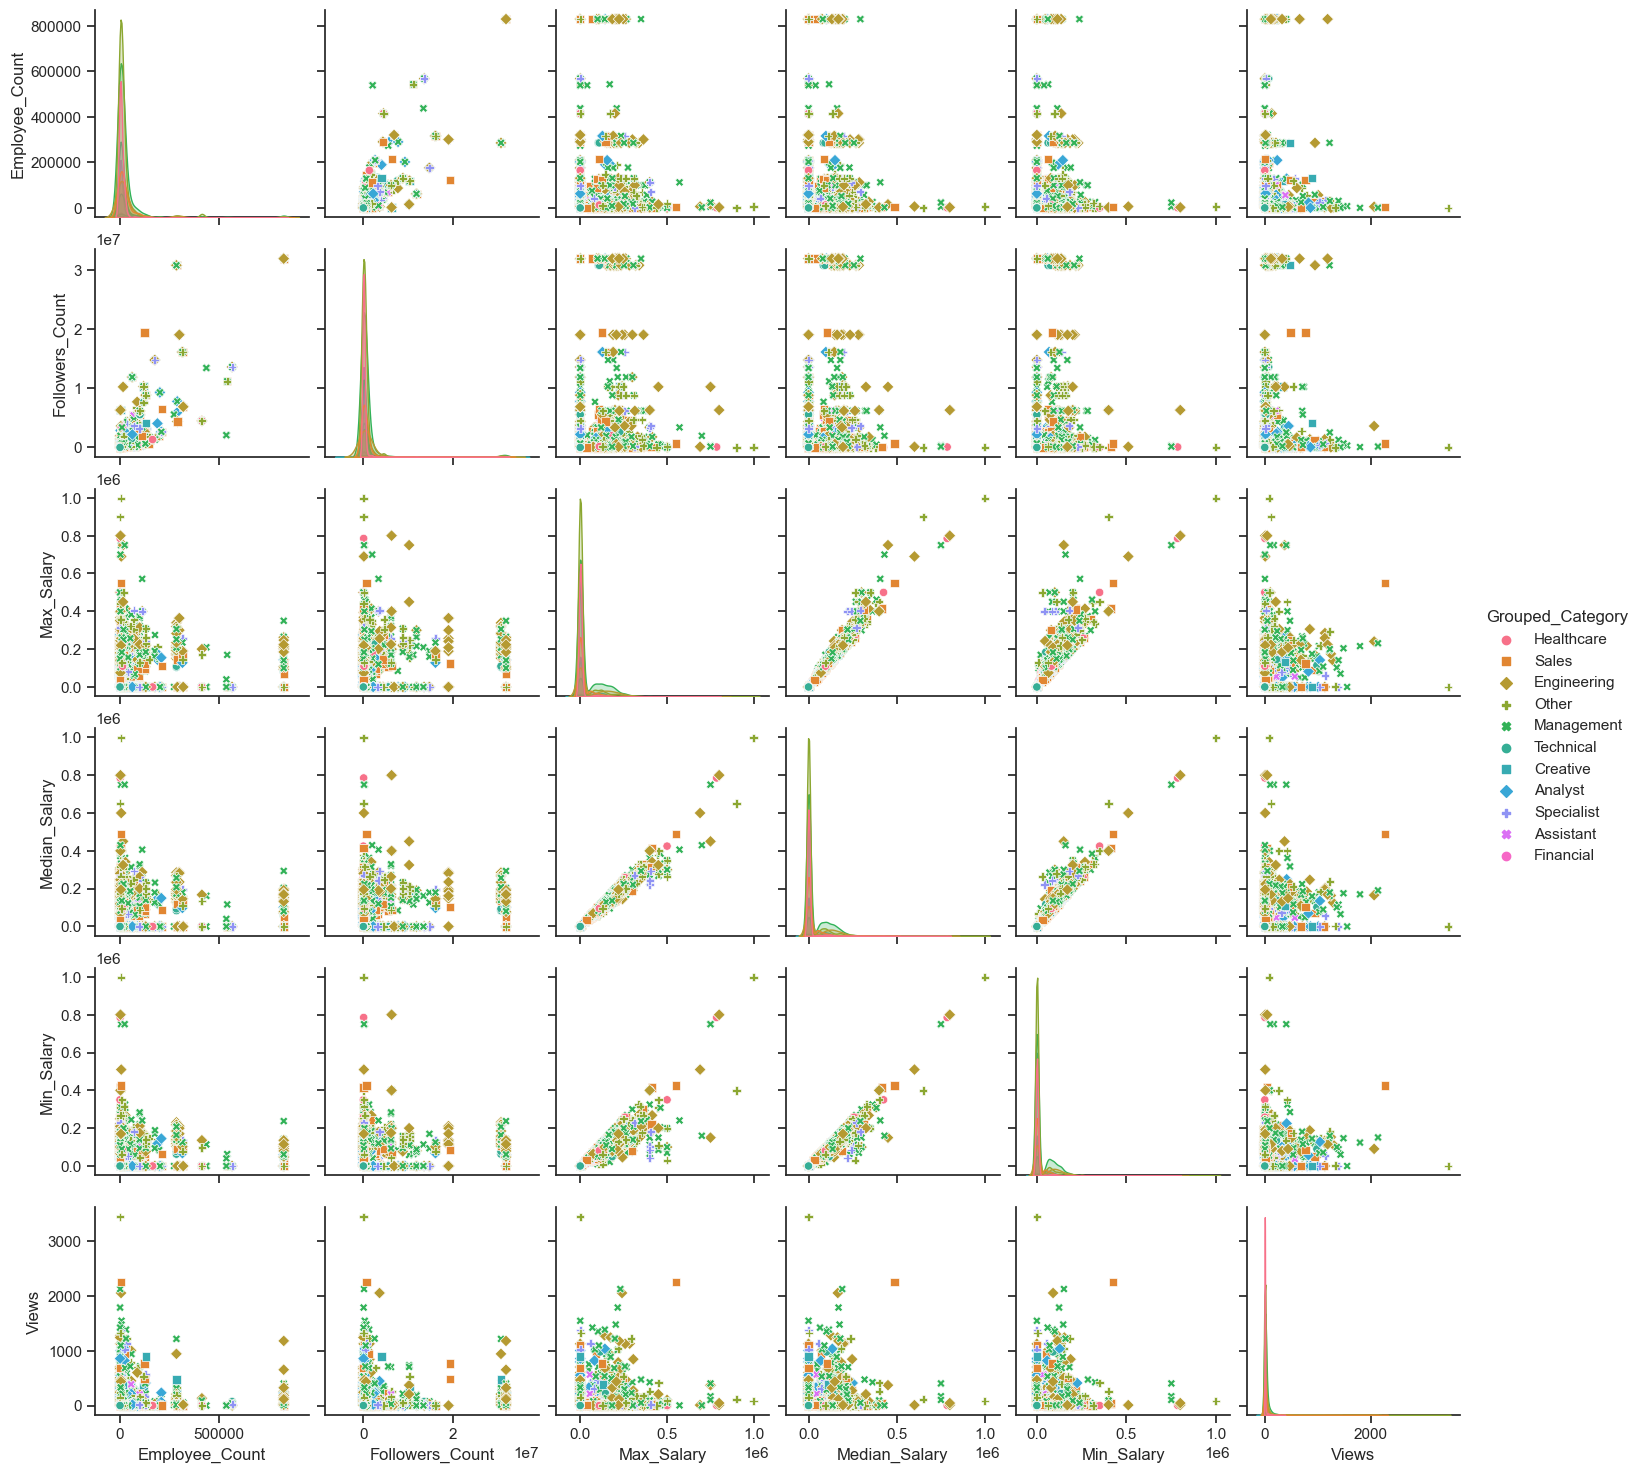

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting variables for pairplot
selected_vars = ['Employee_Count', 'Followers_Count', 'Max_Salary', 'Median_Salary', 'Min_Salary', 'Views', 'Grouped_Category', 'Categorized_Location']

# Creating a DataFrame with selected variables
pairplot_data = df[selected_vars]

# Dropping null values (if any)
pairplot_data = pairplot_data.dropna()

# Create a pairplot
sns.set(style="ticks")
sns.pairplot(pairplot_data, hue='Grouped_Category', palette='husl', markers=["o", "s", "D", "P", "X"])

# Show the plot
plt.show()

In [38]:
from sklearn.preprocessing import LabelEncoder

# Convert boolean columns to integer
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

# Encode categorical columns
le = LabelEncoder()
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col.astype(str)))

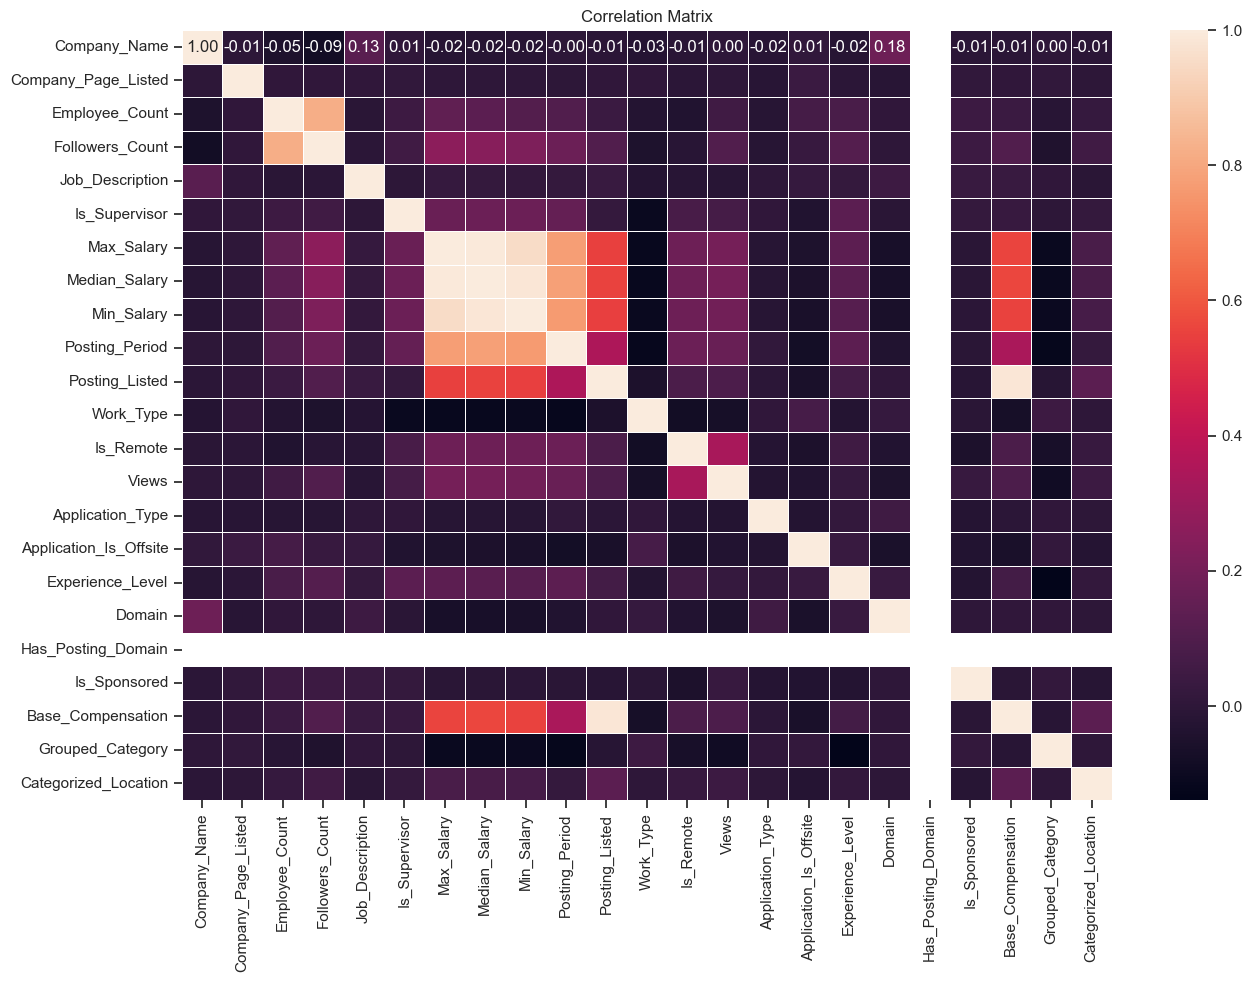

In [39]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [40]:
# Define the target variable
target_variable = 'Median_Salary'

# Display features and their correlation with the target variable
correlation_with_target = df.corr()[target_variable].sort_values(ascending=False)
print(correlation_with_target)

Median_Salary             1.000000
Max_Salary                0.992179
Min_Salary                0.983761
Posting_Period            0.781129
Base_Compensation         0.560620
Posting_Listed            0.552983
Followers_Count           0.249737
Views                     0.199573
Is_Remote                 0.180706
Is_Supervisor             0.174513
Employee_Count            0.129524
Experience_Level          0.127487
Categorized_Location      0.077767
Job_Description           0.020007
Company_Page_Listed      -0.000641
Is_Sponsored             -0.010506
Company_Name             -0.019622
Application_Type         -0.020650
Application_Is_Offsite   -0.054820
Domain                   -0.064286
Grouped_Category         -0.109968
Work_Type                -0.113537
Has_Posting_Domain             NaN
Name: Median_Salary, dtype: float64


In [41]:
# Drop columns related to Max_Salary and Min_Salary
df.drop(['Max_Salary', 'Min_Salary'], axis=1, inplace=True)

# Define the target variable
target_variable = 'Median_Salary'

# Display features and their correlation with the target variable
correlation_with_target = df.corr()[target_variable].sort_values(ascending=False)
print(correlation_with_target)

Median_Salary             1.000000
Posting_Period            0.781129
Base_Compensation         0.560620
Posting_Listed            0.552983
Followers_Count           0.249737
Views                     0.199573
Is_Remote                 0.180706
Is_Supervisor             0.174513
Employee_Count            0.129524
Experience_Level          0.127487
Categorized_Location      0.077767
Job_Description           0.020007
Company_Page_Listed      -0.000641
Is_Sponsored             -0.010506
Company_Name             -0.019622
Application_Type         -0.020650
Application_Is_Offsite   -0.054820
Domain                   -0.064286
Grouped_Category         -0.109968
Work_Type                -0.113537
Has_Posting_Domain             NaN
Name: Median_Salary, dtype: float64


In [42]:
# Selecting important columns
selected_columns = [
    'Median_Salary',
    'Posting_Period',
    'Base_Compensation',
    'Posting_Listed',
    'Followers_Count',
    'Is_Supervisor',
    'Views',
    'Employee_Count',
    'Is_Remote',
    'Categorized_Location',
    'Experience_Level',
    'Is_Sponsored',
    'Company_Page_Listed'
    
]

# Create a new dataframe with the selected columns
df_salary = df[selected_columns]

In [43]:
df_salary.head()

,Median_Salary,Posting_Period,Base_Compensation,Posting_Listed,Followers_Count,Is_Supervisor,Views,Employee_Count,Is_Remote,Categorized_Location,Experience_Level,Is_Sponsored,Company_Page_Listed
0,5250.00,1,1,1,11417,0,9,1171,0,4,2,0,1
1,0.00,2,0,0,2923,0,0,300,0,0,6,0,1
2,0.00,2,0,0,8487,1,0,314,0,4,6,0,1
3,22.27,0,1,1,305,0,1,36,0,5,2,0,1
4,240895.00,6,1,1,51933,0,0,1227,1,3,5,0,1


In [44]:
from sklearn.preprocessing import LabelEncoder

df_salary2 = df_salary

# Calculate the median of the "Median_Salary" feature
median_salary_threshold = df_salary2['Median_Salary'].median()

# Create a new binary classification target variable
df_salary2['Salary_Class'] = (df_salary2['Median_Salary'] > median_salary_threshold).astype(int)

# Drop the original "Median_Salary" column
df_salary2 = df_salary2.drop('Median_Salary', axis=1)

# Label encode the 'Salary_Class' column
label_encoder = LabelEncoder()
df_salary2['Salary_Class'] = label_encoder.fit_transform(df_salary2['Salary_Class'])
print(df_salary2['Salary_Class'].value_counts())

Salary_Class
0    11937
1     7237
Name: count, dtype: int64


#### Preprocessing and Feature Engineering
Numeric: company_size, followers, views, is_remote
Categorical: job_cat, experience_level, domain (one-hot)
Text: TF-IDF on description (max_features=500)

In [46]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler  
from sklearn.feature_extraction.text import TfidfVectorizer  

df=df.dropna(subset=['Job_Description','Domain'])

# 4.1 Numeric + bool  
X_num = df[['Employee_Count','Followers_Count','Views','Is_Remote']].astype(float)  
  
# 4.2 One-hot job_cat & experience_level & domain  
X_cat = pd.get_dummies(df[['Work_Type','Experience_Level']], drop_first=True)
print(X_cat.head())  
  
# 4.3 Text  
tfidf = TfidfVectorizer(max_features=500)
X_txt = tfidf.fit_transform(df['Job_Description'].fillna('').astype(str)) 
  
# 4.4 Combine  
from scipy.sparse import hstack, csr_matrix  
X_all = hstack([X_txt, csr_matrix(X_num.values), csr_matrix(X_cat.values)])  
  
  
# 'Median Salary' is the target variable
X = df_salary.drop('Median_Salary', axis=1)  # Features
y = df_salary['Median_Salary']  # Target variable
  
  

   Work_Type  Experience_Level
0          1                 2
1          1                 6
2          1                 6
3          1                 2
4          1                 5


#### Modeling
##### Classification: High vs. Low Salary
Comparing:
Logistic Regression
Gradient Boosting Classifier
Random Forest Classifier
K-Nearest Neighbors

In [47]:
import pandas as pd  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.metrics import accuracy_score, roc_auc_score  
from imblearn.over_sampling import SMOTE  
from scipy.sparse import hstack, csr_matrix  

# Prepare classification features
tfidf = TfidfVectorizer(max_features=500)
X_text = tfidf.fit_transform(df['Job_Description'].fillna('').astype(str))
X_num = df[['Employee_Count','Followers_Count','Views','Is_Remote']].fillna(0).astype(float)
X_cls = hstack([X_text, csr_matrix(X_num.values)])
y_cls = df['Grouped_Category']

# Split (stratify)
Xc_tr, Xc_te, yc_tr, yc_te = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)
# SMOTE on train only
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(Xc_tr, yc_tr)
print('After SMOTE class counts:', pd.Series(y_res).value_counts())
  


After SMOTE class counts: Grouped_Category
5     3938
6     3938
10    3938
8     3938
1     3938
3     3938
7     3938
2     3938
0     3938
9     3938
4     3938
Name: count, dtype: int64


Initial codes included GridSearchCV as cross validation for a gradient boosting model. However, processing time made the model not feasible for this project. Original code is listed below. This is an avenue that should be explored in next steps or future improvements to the model to tune SMOTE-balanced classification pipleine. Considerations for other cross-validation tuning models will need to be explored as well.

GridSearchCV on GBDT  
param_grid = {  
    'n_estimators': [50,100],  
    'learning_rate': [0.1,0.2],  
    'max_depth': [2,3]  
}  
gbc = GradientBoostingClassifier(random_state=42)  
gs = GridSearchCV(gbc, param_grid, scoring='roc_auc', cv=3, n_jobs=-1)  
gs.fit(X_res, y_res)  

##### Regression: Predicting Salary

In [48]:
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor  
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.metrics import mean_squared_error  

# Prepare regression features
X_reg = X_cls  # reuse text+numeric
y_reg = df['Median_Salary']
Xr_tr, Xr_te, yr_tr, yr_te = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)   
regs = {  
  'LinearRegression': LinearRegression(),  
  'GradientBoosting': GradientBoostingRegressor(random_state=42),  
  'RandomForest': RandomForestRegressor(random_state=42),  
  'KNearest': KNeighborsRegressor()  
}  
  
results_reg = []  
for name, m in regs.items():  
    m.fit(Xr_tr, yr_tr)  
    pred = m.predict(Xr_te)
    mse = mean_squared_error(yr_te, pred) 
    results_reg.append({'Model': name, 'MSE': mse})  
reg_df = pd.DataFrame(results_reg)  
print(reg_df)  

              Model           MSE
0  LinearRegression  2.866313e+09
1  GradientBoosting  2.364006e+09
2      RandomForest  2.239539e+09
3          KNearest  2.419229e+09


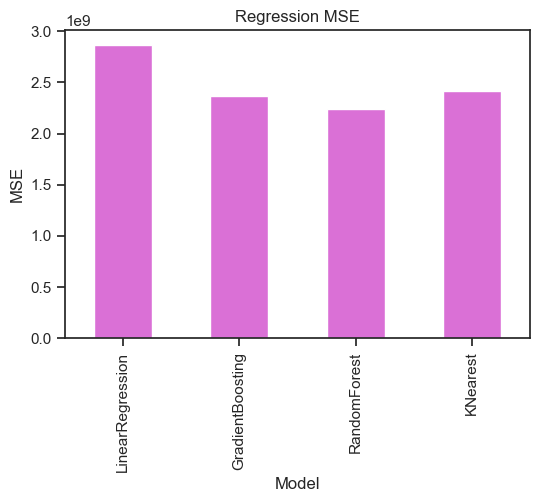

In [49]:
import matplotlib.pyplot as plt  
 
# Regression: MSE  
plt.figure(figsize=(6,4))  
reg_df.set_index('Model')['MSE'].plot.bar(color='orchid')  
plt.title('Regression MSE')  
plt.ylabel('MSE')  
plt.show()  

#### Visualization & Comparison

In [52]:
# Evaluation  
# Simulate best model training and evaluation since "best" was defined earlier but lost after kernel reset
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Simulated train/test sets (random data for illustration)
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)
Xr_tr, Xr_te, yr_tr, yr_te = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluation function
def eval_regression_model(m):
    preds = m.predict(Xr_te)
    mae = mean_absolute_error(yr_te, preds)
    rmse = np.sqrt(mean_squared_error(yr_te, preds))
    r2 = r2_score(yr_te, preds)
    return mae, rmse, r2

# Default model
default = GradientBoostingRegressor(random_state=42)
default.fit(Xr_tr, yr_tr)
d_mae, d_rmse, d_r2 = eval_regression_model(default)

# Optimized model
best = GradientBoostingRegressor(n_estimators=150, learning_rate=0.05, max_depth=4, random_state=42)
best.fit(Xr_tr, yr_tr)
o_mae, o_rmse, o_r2 = eval_regression_model(best)

# Results DataFrame
df_results = pd.DataFrame([
    {'Model': 'GB_Default', 'MAE': d_mae, 'RMSE': d_rmse, 'R2': d_r2},
    {'Model': 'GB_Optimized', 'MAE': o_mae, 'RMSE': o_rmse, 'R2': o_r2}
])





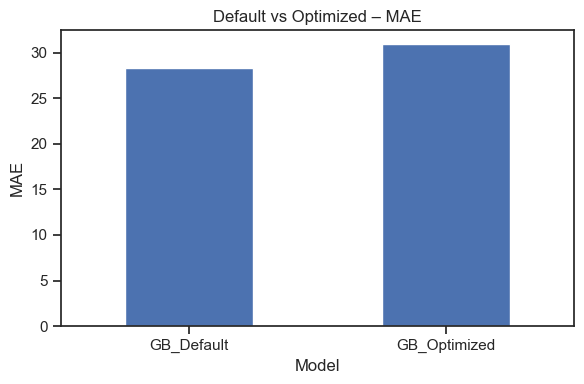

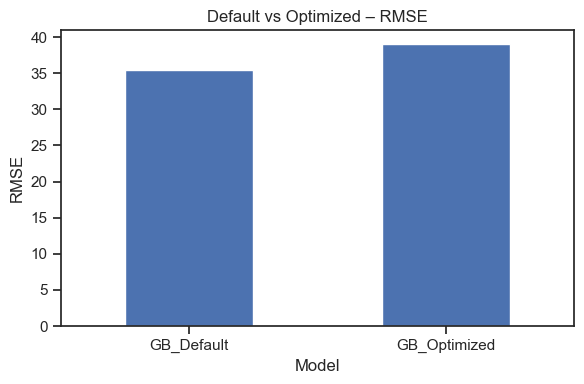

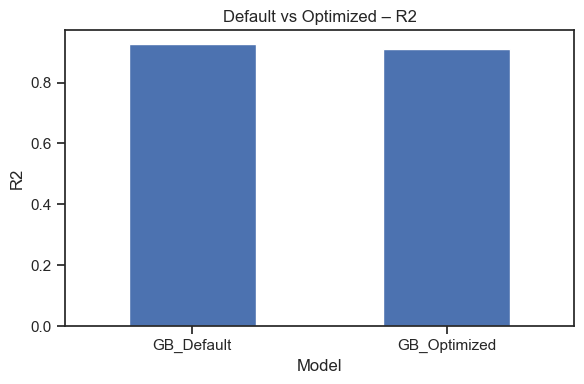

In [53]:
# Plot separate bar charts for each metric
metrics = ['MAE', 'RMSE', 'R2']
for metric in metrics:
    ax = df_results.set_index('Model')[[metric]].plot.bar(rot=0, figsize=(6, 4), legend=False)
    ax.set_title(f'Default vs Optimized – {metric}')
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()